<a href="https://colab.research.google.com/github/Hariharapanda-Deepak/Hotel_booking_Analysis/blob/main/Deepak_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [91]:
#importing Libraries and loading the data file

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [93]:
# Mounting Drive and importing Data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
path='/content/drive/MyDrive/Colab Notebooks/'

df=pd.read_csv(path + 'Hotel Bookings.csv')
df.shape

(119390, 32)

In [95]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [96]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

# **Understanding the DATA**

Droping Duplicate Values
   The duplicate values are identified and the duplicate values are dropped from the data

In [97]:
duplicate_values=df[df.duplicated()]

In [98]:
duplicate_values

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [99]:
df=df.drop_duplicates()
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [100]:
df.shape

(87396, 32)

Finding null values and identifying the data types of each column

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

In [102]:
print(df.isna().sum())

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


In [103]:
# If a booking is done at the counter of the hotel without interference of agent or company the row cannot be removed so we replace those cases with '0'
df[['company','agent']] = df[['company','agent']].fillna(0)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [104]:
print(df.isna().sum())

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           452
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
company                             0
days_in_waiting_list                0
customer_typ

In [105]:
df.shape

(87396, 32)

In [106]:
my_df=df

In [107]:
yearly_df=pd.DataFrame().assign(arrival_date_year=df['arrival_date_year'],adr=df['adr'])

In [108]:
yearly_df

,arrival_date_year,adr
0,2015,0.00
1,2015,0.00
2,2015,75.00
3,2015,75.00
4,2015,98.00
...,...,...
119385,2017,96.14
119386,2017,225.43
119387,2017,157.71
119388,2017,104.40


In [109]:
a=yearly_df['adr'].values

In [110]:
a

array([  0.  ,   0.  ,  75.  , ..., 157.71, 104.4 , 151.2 ])

In [111]:
y=yearly_df['arrival_date_year'].values

In [112]:
y

array([2015, 2015, 2015, ..., 2017, 2017, 2017])

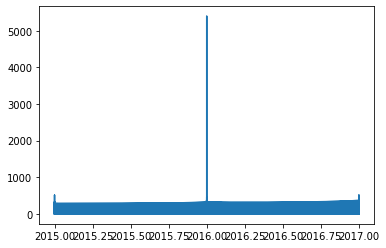

In [113]:
plt.plot(y,a)

In [114]:
yearly_count=yearly_df.groupby('arrival_date_year')['adr'].count().reset_index()

In [115]:
yearly_count

,arrival_date_year,adr
0,2015,13313
1,2016,42391
2,2017,31692


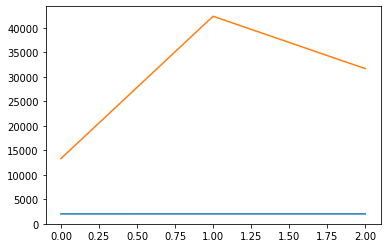

In [116]:
plt.plot(yearly_count)

In [117]:
a.sum()

9293449.99

In [118]:
b=yearly_df['arrival_date_year'].unique().tolist()

In [119]:
b

[2015, 2016, 2017]

In [120]:
c=[]

In [121]:
for x in b:
  c.append(yearly_df.loc[yearly_df['arrival_date_year'] == x, 'adr'].mean())

In [122]:
c

[92.16075189664237, 101.53890330494679, 118.71066041903319]

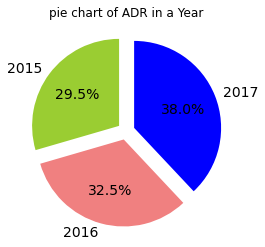

In [123]:
colors=['yellowgreen', 'lightcoral','blue']
explode = (0.1, 0.1,0.1)
plt.pie(c, explode=explode, labels=b, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.title('pie chart of ADR in a Year')
plt.show()

In [124]:
df["period"] = df["arrival_date_year"].astype(str) + df["arrival_date_month"]
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,period
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015July
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015July
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015July
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015July
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017August
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017August
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017August
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017August


In [125]:
b=df['period'].unique().tolist()
b

['2015July',
 '2015August',
 '2015September',
 '2015October',
 '2015November',
 '2015December',
 '2016January',
 '2016February',
 '2016March',
 '2016April',
 '2016May',
 '2016June',
 '2016July',
 '2016August',
 '2016September',
 '2016October',
 '2016November',
 '2016December',
 '2017January',
 '2017February',
 '2017March',
 '2017April',
 '2017May',
 '2017June',
 '2017July',
 '2017August']

In [126]:
c=[]
for x in b:
  c.append(df.loc[df['period'] == x, 'adr'].mean())

In [127]:
c

[112.39937873357228,
 122.99439054219323,
 99.87818950334625,
 78.92546296296297,
 59.236336336336336,
 71.54029263370332,
 62.69845862628448,
 69.9317640769779,
 79.48363090576873,
 90.9726525198939,
 100.08823809523811,
 108.86535115154962,
 131.39620877694108,
 148.83396789509382,
 121.0775045442742,
 97.31195323571093,
 79.5135225225225,
 87.68759923785329,
 74.83075949367088,
 78.74954131227219,
 83.82144486692015,
 115.12843160947318,
 120.37301857923498,
 128.76182674199623,
 147.6131222418358,
 168.54932663775392]

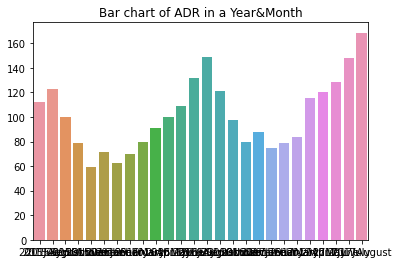

In [128]:
sns.barplot( x = b, y=c)
plt.rcParams["figure.figsize"] = [160, 5]
plt.title('Bar chart of ADR in a Year&Month')
plt.show()

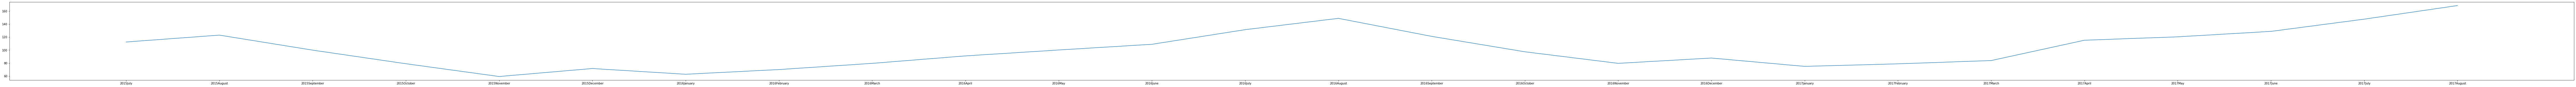

In [129]:
plt.plot(b,c)

In [130]:
adr_hotelwise=df.groupby(['period','hotel'])['adr'].mean().unstack()
adr_hotelwise

hotel,City Hotel,Resort Hotel
period,,
2015August,82.980958,155.902912
2015December,82.672814,59.736580
2015July,66.813013,126.478045
2015November,73.900213,45.771924
2015October,95.088493,56.841183
2015September,106.795730,89.967198
2016April,103.867820,68.042631
2016August,124.245032,191.921985
2016December,97.855461,70.133732


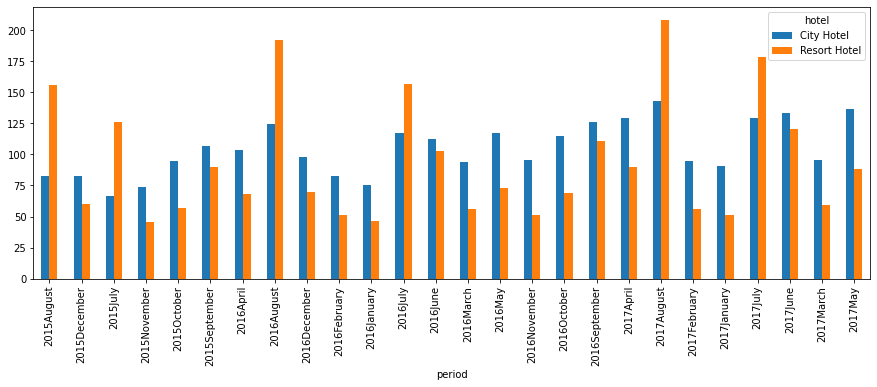

In [131]:
plt.rcParams['figure.figsize'] = (15, 5)
adr_hotelwise.plot(kind='bar')

From the above chart we can draw into a conclusion that the bookings are **increasing** from **January to August** and then **decreasing** from **August to January** every year

In [132]:
b=df['country'].unique().tolist()
b

['PRT',
 'GBR',
 'USA',
 'ESP',
 'IRL',
 'FRA',
 nan,
 'ROU',
 'NOR',
 'OMN',
 'ARG',
 'POL',
 'DEU',
 'BEL',
 'CHE',
 'CN',
 'GRC',
 'ITA',
 'NLD',
 'DNK',
 'RUS',
 'SWE',
 'AUS',
 'EST',
 'CZE',
 'BRA',
 'FIN',
 'MOZ',
 'BWA',
 'LUX',
 'SVN',
 'ALB',
 'IND',
 'CHN',
 'MEX',
 'MAR',
 'UKR',
 'SMR',
 'LVA',
 'PRI',
 'SRB',
 'CHL',
 'AUT',
 'BLR',
 'LTU',
 'TUR',
 'ZAF',
 'AGO',
 'ISR',
 'CYM',
 'ZMB',
 'CPV',
 'ZWE',
 'DZA',
 'KOR',
 'CRI',
 'HUN',
 'ARE',
 'TUN',
 'JAM',
 'HRV',
 'HKG',
 'IRN',
 'GEO',
 'AND',
 'GIB',
 'URY',
 'JEY',
 'CAF',
 'CYP',
 'COL',
 'GGY',
 'KWT',
 'NGA',
 'MDV',
 'VEN',
 'SVK',
 'FJI',
 'KAZ',
 'PAK',
 'IDN',
 'LBN',
 'PHL',
 'SEN',
 'SYC',
 'AZE',
 'BHR',
 'NZL',
 'THA',
 'DOM',
 'MKD',
 'MYS',
 'ARM',
 'JPN',
 'LKA',
 'CUB',
 'CMR',
 'BIH',
 'MUS',
 'COM',
 'SUR',
 'UGA',
 'BGR',
 'CIV',
 'JOR',
 'SYR',
 'SGP',
 'BDI',
 'SAU',
 'VNM',
 'PLW',
 'QAT',
 'EGY',
 'PER',
 'MLT',
 'MWI',
 'ECU',
 'MDG',
 'ISL',
 'UZB',
 'NPL',
 'BHS',
 'MAC',
 'TGO',
 'TWN',
 'D

In [133]:
c=[]
for x in b:
  c.append(df.loc[df['country'] == x, 'adr'].sum())

In [134]:
c

[2631082.11,
 1018981.3200000001,
 235615.49,
 886800.74,
 303177.79000000004,
 994444.91,
 0.0,
 53434.350000000006,
 63882.72,
 1786.08,
 23709.28,
 83804.15,
 570695.54,
 240104.09000000003,
 193353.28,
 123575.57,
 12956.23,
 355852.27999999997,
 208689.53,
 45627.09999999999,
 68841.98,
 97819.41,
 44936.09,
 9120.280000000002,
 15461.66,
 224890.24,
 43393.47,
 6470.4,
 118.5,
 35530.43,
 5174.18,
 937.2399999999999,
 16458.53,
 93085.68999999999,
 8475.48,
 32465.36,
 6112.27,
 88.2,
 5020.24,
 862.46,
 5547.4400000000005,
 7727.9,
 104106.06,
 2365.58,
 7271.15,
 24281.22,
 8662.32,
 40345.75,
 49645.69,
 40.5,
 203.76999999999998,
 2091.0600000000004,
 341.23,
 9568.59,
 13397.179999999998,
 1860.11,
 23259.660000000003,
 6611.33,
 3894.96,
 634.71,
 10245.45,
 3030.4500000000003,
 10118.060000000001,
 3001.3500000000004,
 1418.57,
 2536.2400000000002,
 3935.19,
 1114.01,
 398.32,
 4460.870000000001,
 8283.96,
 182.9,
 2101.26,
 3562.69,
 1489.3999999999999,
 2224.21,
 5563.92

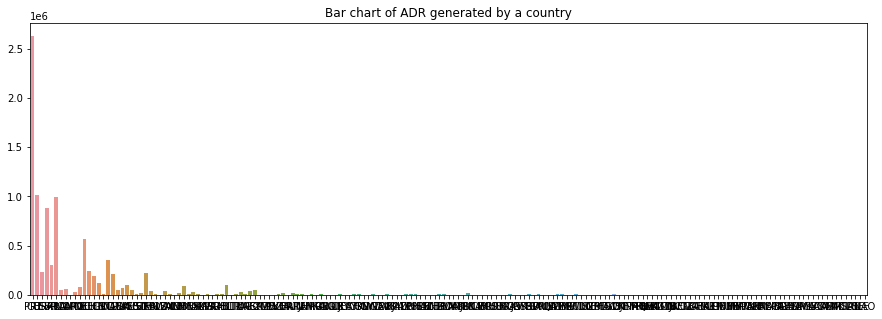

In [135]:

sns.barplot( x = b, y=c)
plt.rcParams["figure.figsize"] = [160, 10]
plt.title('Bar chart of ADR generated by a country')
plt.show()

In [136]:
df1 = pd.DataFrame({'Country': b,'adr_sum': c,})

In [137]:
df1

,Country,adr_sum
0,PRT,2631082.11
1,GBR,1018981.32
2,USA,235615.49
3,ESP,886800.74
4,IRL,303177.79
...,...,...
173,KIR,108.00
174,SDN,99.00
175,ATF,126.00
176,SLE,121.43


In [138]:
df1=df1.sort_values(by='adr_sum', ascending=False)

In [139]:
df1

,Country,adr_sum
0,PRT,2631082.11
1,GBR,1018981.32
5,FRA,994444.91
3,ESP,886800.74
12,DEU,570695.54
...,...,...
121,BHS,50.85
107,BDI,46.00
117,MDG,44.00
49,CYM,40.50


In [140]:
df1.head(10)

,Country,adr_sum
0,PRT,2631082.11
1,GBR,1018981.32
5,FRA,994444.91
3,ESP,886800.74
12,DEU,570695.54
17,ITA,355852.28
4,IRL,303177.79
13,BEL,240104.09
2,USA,235615.49
25,BRA,224890.24


In [141]:
adr_hotelwise

hotel,City Hotel,Resort Hotel
period,,
2015August,82.980958,155.902912
2015December,82.672814,59.736580
2015July,66.813013,126.478045
2015November,73.900213,45.771924
2015October,95.088493,56.841183
2015September,106.795730,89.967198
2016April,103.867820,68.042631
2016August,124.245032,191.921985
2016December,97.855461,70.133732


In [142]:
index=list(adr_hotelwise.columns)
col=list(adr_hotelwise.index)

m_df = pd.DataFrame(abs(np.random.randn(2, 26)), index=index, columns=col)
m_df.style.background_gradient(cmap='RdYlGn_r')


,2015August,2015December,2015July,2015November,2015October,2015September,2016April,2016August,2016December,2016February,2016January,2016July,2016June,2016March,2016May,2016November,2016October,2016September,2017April,2017August,2017February,2017January,2017July,2017June,2017March,2017May
City Hotel,0.543330,1.379464,0.076590,0.636863,0.377513,0.059806,0.013525,0.231732,0.227906,0.039908,0.302933,0.445732,1.111645,0.031520,1.016717,1.329108,1.030148,1.792911,1.714605,0.409229,0.463399,0.100608,0.053064,0.742701,0.219826,0.859195
Resort Hotel,0.272773,0.982718,1.546312,1.292423,1.443213,0.020736,0.572425,0.131694,1.986378,1.412607,0.631499,0.031974,0.448214,0.279115,0.588483,0.029281,1.010456,0.086511,0.515379,0.212302,0.804461,0.641420,1.710661,0.608514,1.693193,0.257442


In [143]:
hotel_time=pd.DataFrame().assign(country=df['country'],lead_time=df['lead_time'],waiting_time=df['days_in_waiting_list'])

In [144]:
li=[0]
df_new = df.loc[df['days_in_waiting_list']>0]
df_new

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,period
2272,Resort Hotel,0,59,2015,October,41,8,0,3,2,...,281.0,0.0,50,Contract,45.0,0,0,Check-Out,2015-10-11,2015October
2486,Resort Hotel,0,47,2015,October,43,19,1,4,2,...,0.0,0.0,47,Transient-Party,76.8,0,0,Check-Out,2015-10-24,2015October
2508,Resort Hotel,0,47,2015,October,43,19,1,4,2,...,0.0,0.0,47,Transient-Party,76.8,0,0,Check-Out,2015-10-24,2015October
3106,Resort Hotel,0,105,2015,November,47,18,2,4,2,...,313.0,0.0,65,Transient-Party,69.0,0,0,Check-Out,2015-11-24,2015November
3118,Resort Hotel,0,105,2015,November,47,18,2,4,2,...,313.0,0.0,65,Transient-Party,71.0,0,0,Check-Out,2015-11-24,2015November
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111978,City Hotel,0,345,2017,May,19,13,2,3,2,...,467.0,0.0,36,Transient-Party,89.1,0,0,Check-Out,2017-05-18,2017May
112021,City Hotel,0,34,2017,May,20,16,0,3,1,...,474.0,0.0,9,Transient-Party,130.0,0,0,Check-Out,2017-05-19,2017May
112822,City Hotel,0,344,2017,May,21,27,1,1,2,...,12.0,0.0,98,Transient-Party,128.0,0,1,Check-Out,2017-05-29,2017May
114733,City Hotel,0,322,2017,June,25,23,2,2,2,...,37.0,0.0,59,Transient-Party,105.0,0,3,Check-Out,2017-06-27,2017June


In [145]:
df_new.shape

(860, 33)

In [146]:
time_df= pd.DataFrame({'Country': df_new['country'],'Lead Time': df_new['lead_time'],'Waiting':df_new['days_in_waiting_list']})

In [147]:
time_df

,Country,Lead Time,Waiting
2272,PRT,59,50
2486,ESP,47,47
2508,PRT,47,47
3106,ESP,105,65
3118,PRT,105,65
...,...,...,...
111978,MOZ,345,36
112021,ESP,34,9
112822,PRT,344,98
114733,PRT,322,59


In [157]:
time_analysis=time_df.groupby('Country')

In [159]:
T1=time_analysis.describe()
T1

Lead Time                                                        \
            count        mean         std    min     25%    50%     75%   
Country                                                                   
ARG           4.0   32.750000    0.500000   32.0   32.75   33.0   33.00   
ARM           1.0   33.000000         NaN   33.0   33.00   33.0   33.00   
AUT          18.0  205.611111   86.459878   62.0  146.00  251.0  265.00   
BEL           2.0  171.500000   28.991378  151.0  161.25  171.5  181.75   
BGR           1.0  151.000000         NaN  151.0  151.00  151.0  151.00   
BLR           1.0  151.000000         NaN  151.0  151.00  151.0  151.00   
BRA           9.0   92.000000  110.160111   32.0   33.00   33.0   81.00   
CHE           2.0  193.000000    7.071068  188.0  190.50  193.0  195.50   
CHL           1.0   33.000000         NaN   33.0   33.00   33.0   33.00   
CHN           3.0   56.666667   77.680972    5.0   12.00   19.0   82.50   
CN            2.0  192.500000   33.234019  169.0  180.75  192.5  204.25   
CRI           1.0    6.000000         NaN    6.0    6.00    6.0    6.00   
CYP           2.0   58.000000    0.000000   58.0   58.00   58.0   58.00   
CZE           4.0  171.500000   23.671361  151.0  151.00  171.5  192.00   
DEU          45.0  215.666667   90.395344   73.0  151.00  221.0  276.00   
DNK           1.0  151.000000         NaN  151.0  151.00  151.0  151.00   
DOM           1.0  338.000000         NaN  338.0  338.00  338.0  338.00   
DZA           1.0   47.000000         NaN   47.0   47.00   47.0   47.00   
EGY           2.0  149.000000    0.000000  149.0  149.00  149.0  149.00   
ESP          20.0   97.000000   71.221670   33.0   34.00   85.5  151.00   
FIN           2.0  177.500000  146.371104   74.0  125.75  177.5  229.25   
FRA          80.0  204.287500  122.109537    5.0  110.00  235.0  291.75   
GBR          49.0  261.551020   90.313358    1.0  201.00  302.0  339.00   
GRC           1.0  151.000000         NaN  151.0  151.00  151.0  151.00   
HRV           2.0  110.500000   27.577164   91.0  100.75  110.5  120.25   
IRL           4.0  149.000000   78.519637   81.0   81.00  149.0  217.00   
ISL           6.0  270.000000    0.000000  270.0  270.00  270.0  270.00   
ISR           9.0   49.333333   32.523069    6.0    6.00   69.0   72.00   
ITA          50.0  161.720000  107.635447   33.0   81.00   88.0  286.00   
JOR           1.0  151.000000         NaN  151.0  151.00  151.0  151.00   
KAZ           1.0  169.000000         NaN  169.0  169.00  169.0  169.00   
LUX           1.0  140.000000         NaN  140.0  140.00  140.0  140.00   
LVA           2.0  159.500000   12.020815  151.0  155.25  159.5  163.75   
MOZ           1.0  345.000000         NaN  345.0  345.00  345.0  345.00   
NLD           9.0  138.222222   75.154471   30.0  135.00  140.0  151.00   
NOR           1.0  151.000000         NaN  151.0  151.00  151.0  151.00   
NZL           2.0  298.000000    0.000000  298.0  298.00  298.0  298.00   
POL           7.0  297.571429   64.631925  151.0  322.00  322.0  322.00   
PRT         482.0  167.120332   94.915555    4.0   88.00  154.5  216.25   
ROU           3.0  192.666667   72.168784  151.0  151.00  151.0  213.50   
RUS           7.0  157.714286   46.356281   69.0  151.00  169.0  169.50   
SRB           2.0  151.000000    0.000000  151.0  151.00  151.0  151.00   
SVN           1.0  151.000000         NaN  151.0  151.00  151.0  151.00   
SWE           7.0  269.000000   66.525684  119.0  288.00  290.0  297.00   
THA           1.0  113.000000         NaN  113.0  113.00  113.0  113.00   
TUR           2.0   84.500000   94.045202   18.0   51.25   84.5  117.75   
USA           6.0  215.500000   23.355941  168.0  222.25  226.0  226.00   

               Waiting                                                       \
           max   count        mean        std    min     25%    50%     75%   
Country                                                                       
ARG       33.0     4

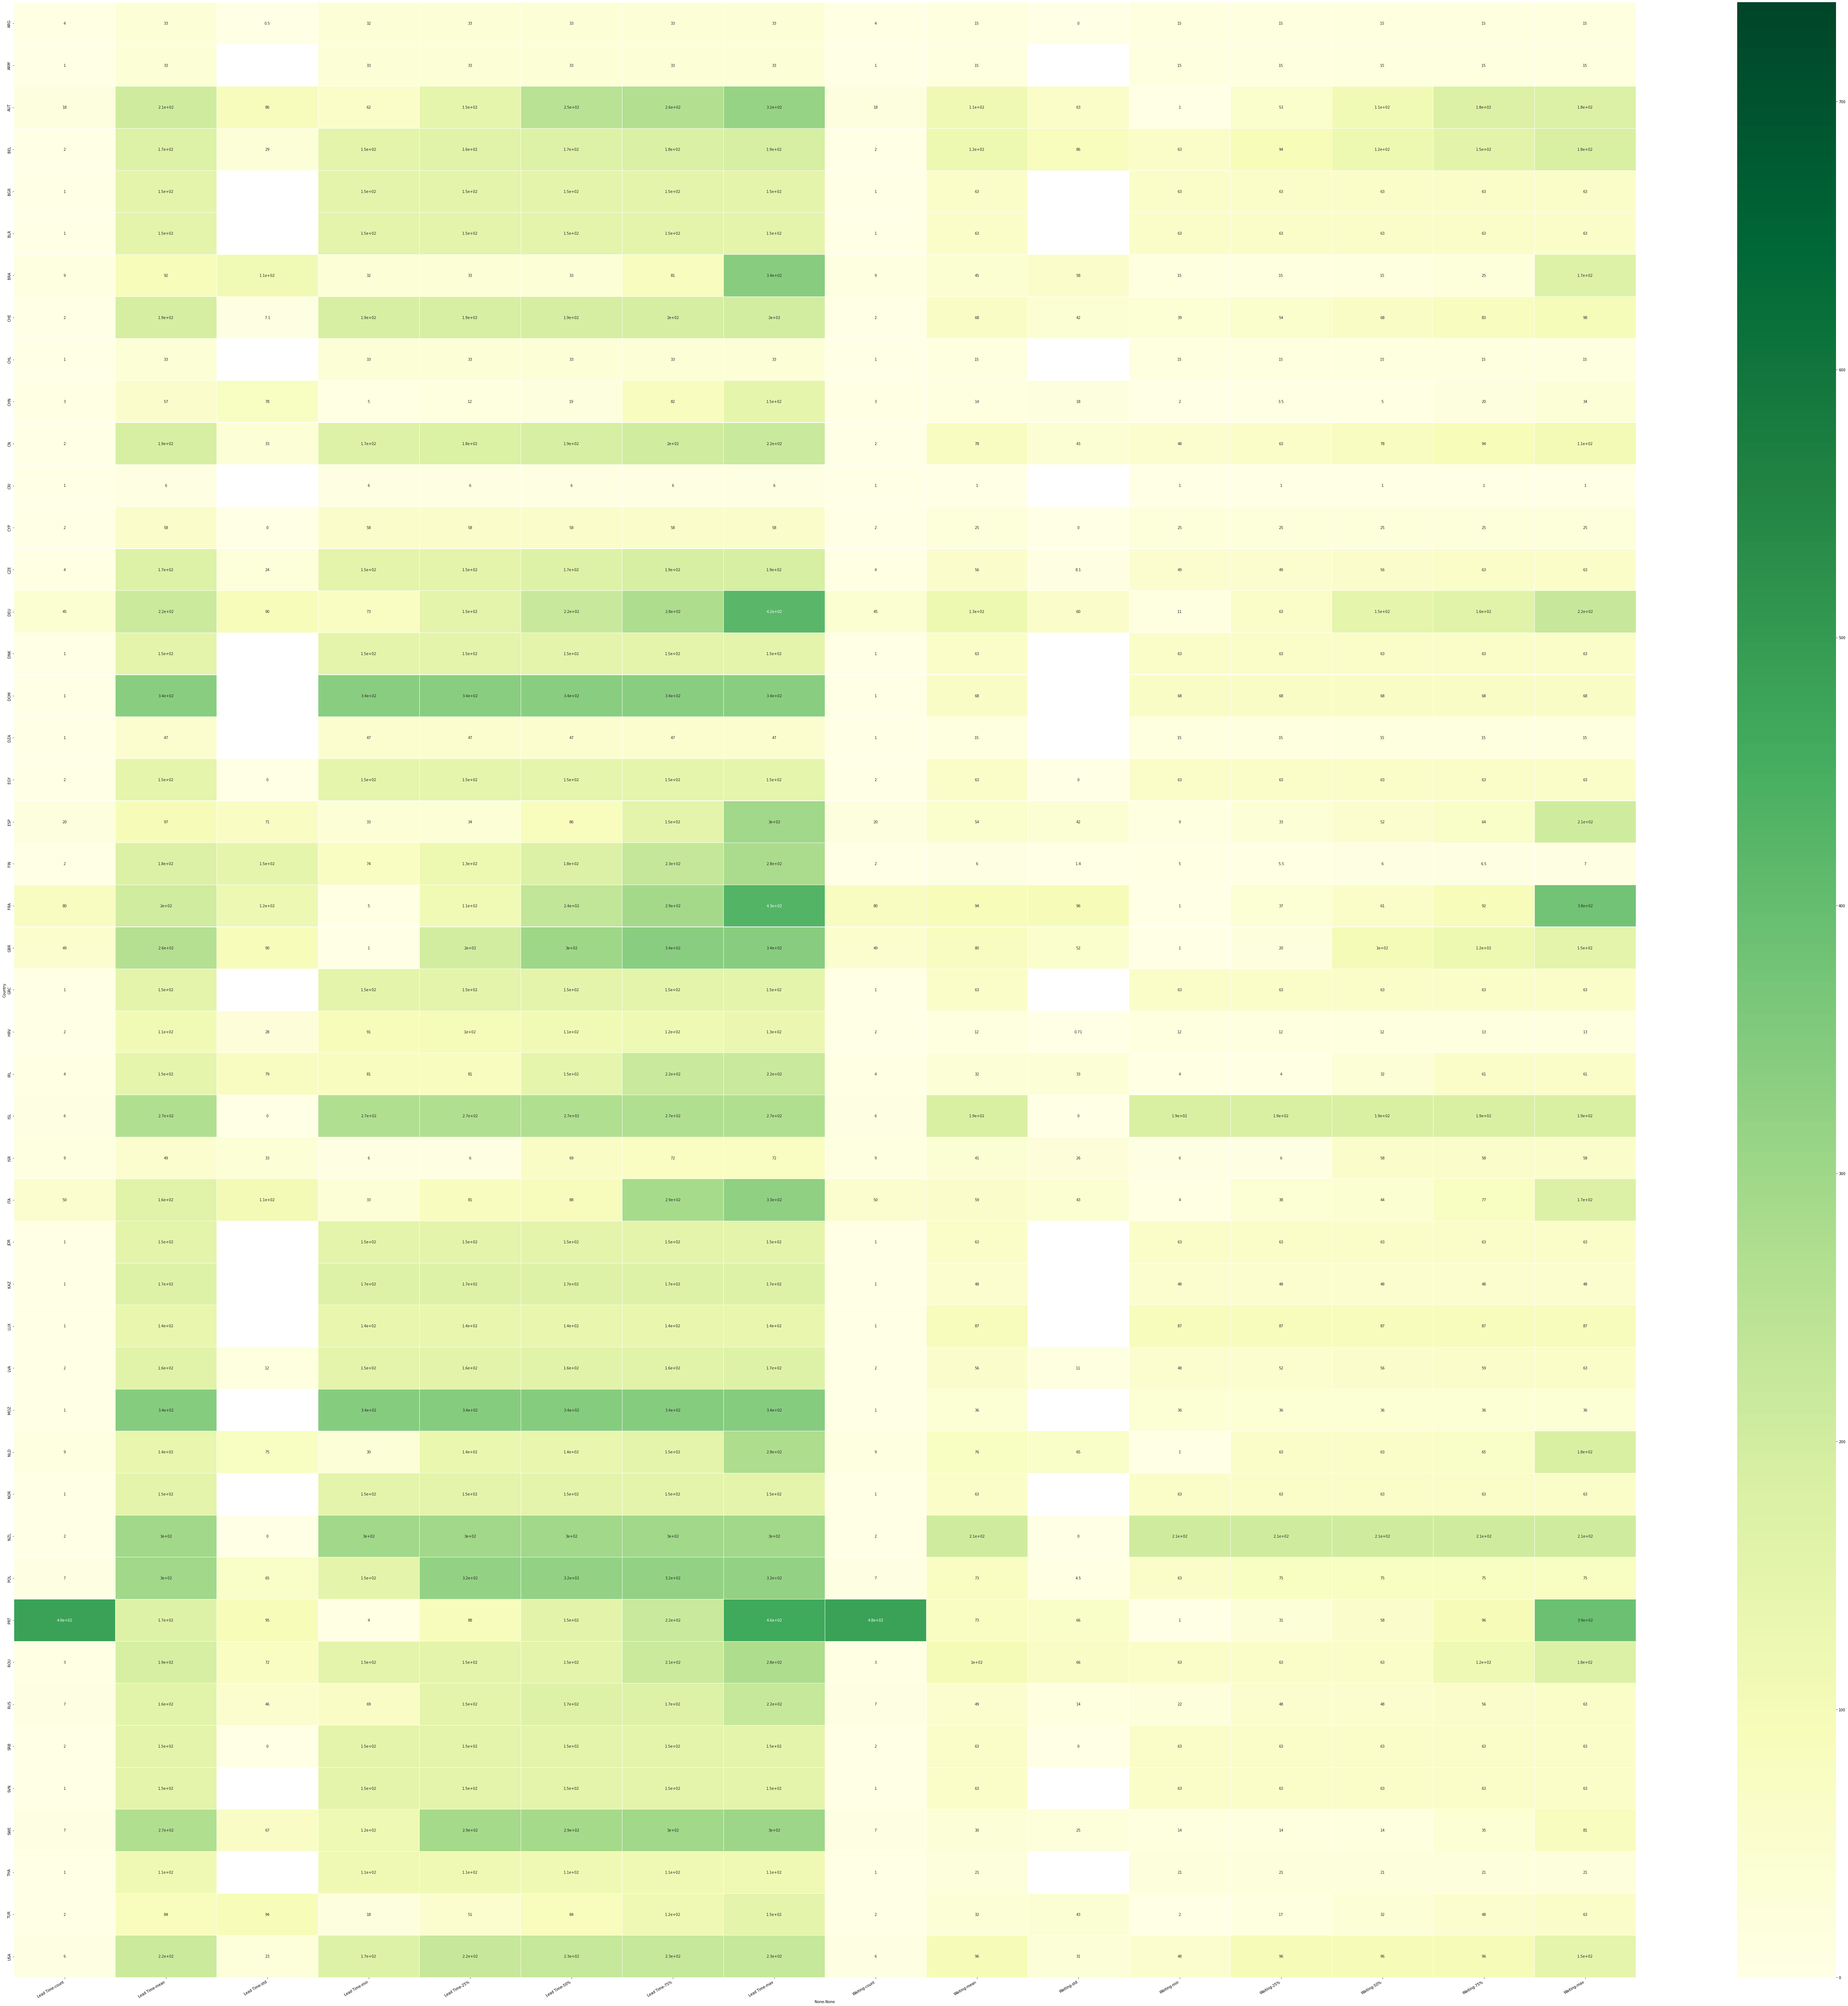

In [160]:
plt.figure(figsize=(100, 100))
sns.heatmap(T1, vmax=737, annot=True, linewidths=.1,cmap='YlGn')
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

In [149]:
rooms_df= pd.DataFrame({'reserved': df['reserved_room_type'],'assigned': df['assigned_room_type'],'is_canceled':df['is_canceled']})

In [152]:
room_analysis=rooms_df.value_counts().unstack()
room_analysis[0] = room_analysis[0].fillna(0)
room_analysis[1] = room_analysis[1].fillna(0)
room_analysis
room_analysis['percent of canceled'] = (room_analysis[1] / (room_analysis[1]+room_analysis[0])) * 100

In [154]:
R1=room_analysis.drop([0, 1], axis=1)
R1

is_canceled        percent of canceled
reserved assigned                     
A        A                   30.876872
         B                    9.284116
         C                    7.961783
         D                    3.900156
         E                    4.057971
...                                ...
L        C                  100.000000
         F                    0.000000
         H                    0.000000
         L                  100.000000
P        P                  100.000000

[75 rows x 1 columns]

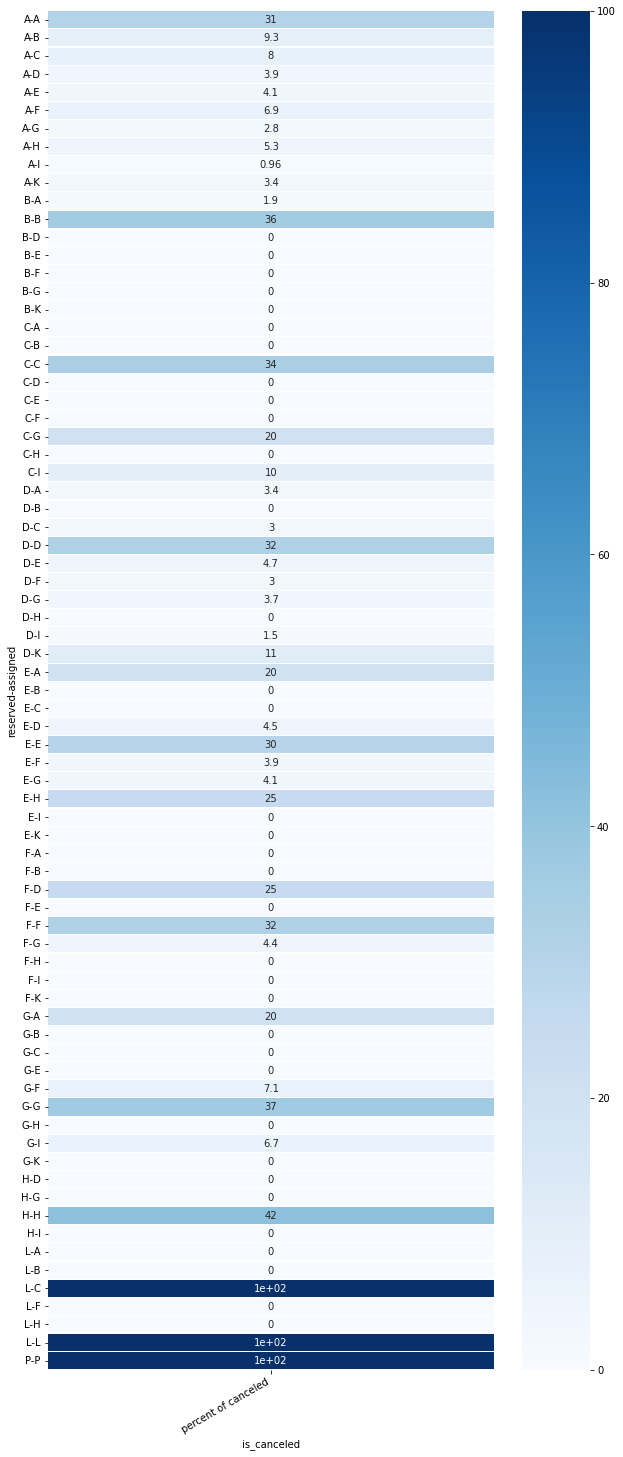

In [155]:
plt.figure(figsize=(10, 25))
sns.heatmap(R1, vmax=100, annot=True, linewidths=0.1,cmap='Blues')
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()